<a href="https://colab.research.google.com/github/ummulqura/Pengantar-Data-Science/blob/main/Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##   **Nama : Ummul Qura** 
##   **NIM : H071201017**
##   **Kelas : Pengantar Data Science** 
---




# **DATA DESCRIPTION**

## **Deskripsi Data**

Dataset ini merupakan dataset terkait 299 pasien yang mengalami gagal jantung yang dikumpulkan dari Faisalabad Institute of Cardiology dan Allied Hospital in Faisalabad selama bulan April-Desember 2015. Dataset ini terdiri dari 105 pasien wanita dan 194 pasien pria yang memiliki rentang umur antara 40-95 tahunAdapun Atribut dalam dataset ini sebagai berikut:
1. age : umur dari pasien (years).
2. anaemia: kekurangan sel darah merah atau hemoglobin (boolean)
3. high blood pressure : jika pasien menderita hipertensi (boolean)
4. creatinine phosphokinase (CPK): tingkatan dari enzim CPK dalam darah (mcg/L)
5. diabetes : jika pasien menderita diabetes (boolean)
6. ejection fraction: persentase darah yang meninggalkan jantung pada setiap kontraksi (persen)
7. sex : wanita atau pria (biner)
8. platelets : trombosit dalam darah (kiloplatelets/mL)
9. serum creatinine : kadar kreatinin serum dalam darah (mg/dL)
10. serum sodium : kadar sodium dalam darah (mEq/L)
11. smoiking : jika pasien merokok (boolean)
12. time : periode tindak lanjut (days)
13.  (target) death event : jika pasien meninggal dalam masa tindak lanjut (boolean)
> **Source Dataset :** https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

> **Source:** The original dataset version was collected by Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza (Government College University, Faisalabad, Pakistan) and made available by them on FigShare under the Attribution 4.0 International (CC BY 4.0: freedom to share and adapt the material) copyright in July 2017.






## **1. Read Data**

### **1.1 Import Library**

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE

### **1.2 Menampilkan Data Set**

In [2]:
# Read dan tampilkan data
df = pd.read_csv('/content/drive/MyDrive/ML/Dataset/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


dapat dilihat jika tidak terdapat data dengan missing values dan terdapat 3 data bertipe float serta selebihnya bertipe data integer

## **2. Split Data**

In [4]:
# Menampilkan banyaknya pasien yg meninggal dan survived
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

jika lihat datanya tidak seimbang antara data pasien yang meninggal dan survive. maka kita akan tangani hal ini dengan menggunakan teknik oversampling SMOTE

In [5]:
# Pembuatan variabel x dan y
y = df.DEATH_EVENT
X = df.drop(['DEATH_EVENT'], axis = 1)

In [6]:
# Split Data ke data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Oversampling dengan menggunakan SMOTE
sm = SMOTE(random_state=14)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [8]:
# tampilkan jumlah data train dan data test
print("Jumlah data train : ", len(X_train_sm))
print("jumlah data test : ", len(X_test))

Jumlah data train :  336
jumlah data test :  60


## **3. Visualisasi Data**

In [9]:
## Set theme ##
sns.set_theme(style='darkgrid')

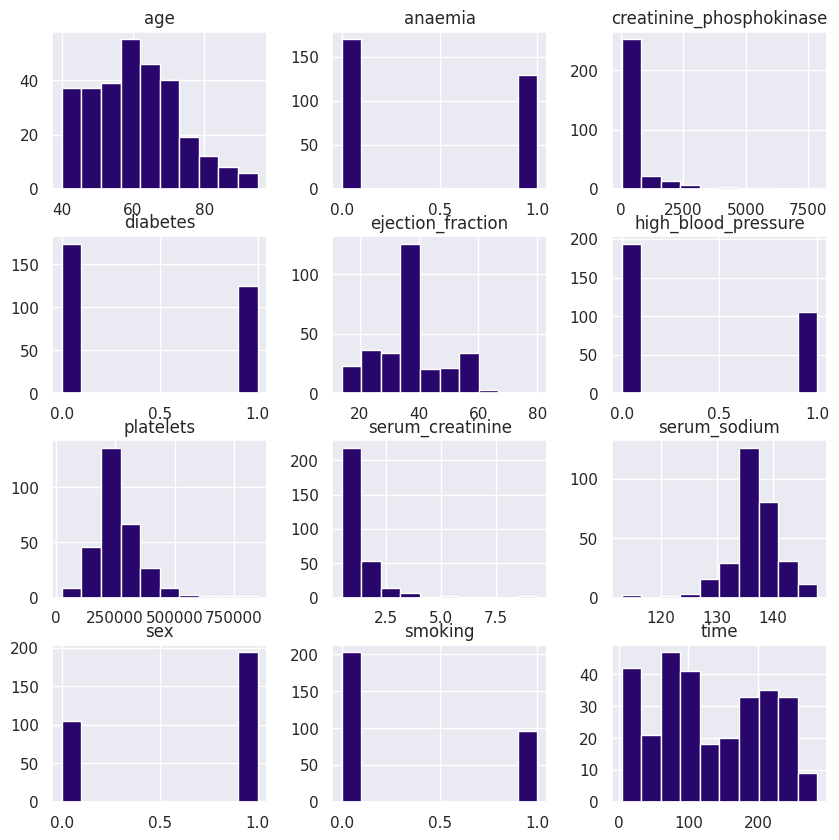

In [10]:
## Visualisasi Data X ##
df.iloc[:,:-1].hist(figsize=(10,10), color='#29066B')
plt.show()

In [11]:
## Visualisasi Data Y

## membuat variabel baru Y untuk menyimpan uniq dari y ##
Y = []
for i in pd.unique(y):
    Y.append(i)
    
nY = []
tmp0 = 0; #index#
for i in Y:
    nY.append(0)
    for j in y:
        if j == i:
            nY[tmp0] += 1    
    tmp0 += 1

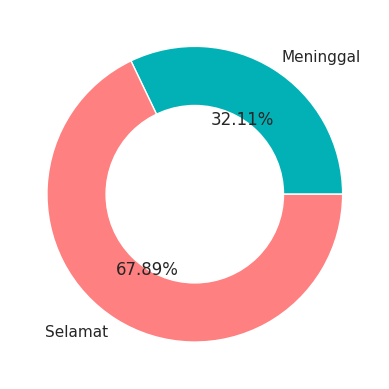

In [12]:
names = ['Meninggal', 'Selamat']
marks = nY
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(marks, labels=names, autopct='%.2f%%', colors=['#01b1b5', '#FF8080'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

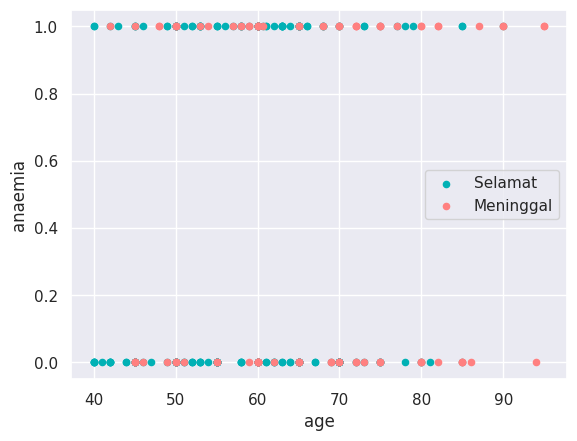

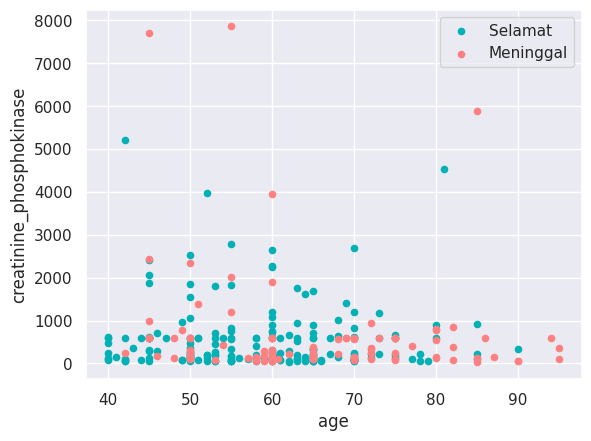

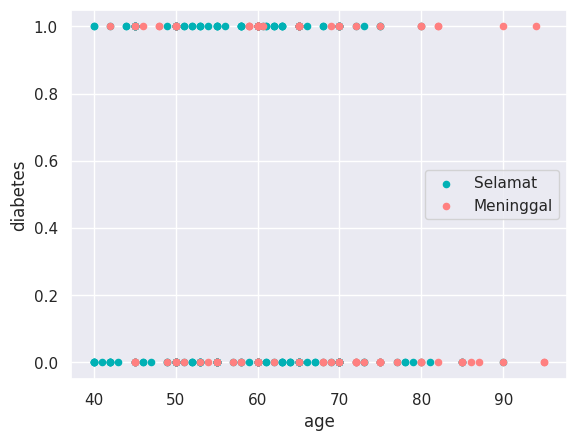

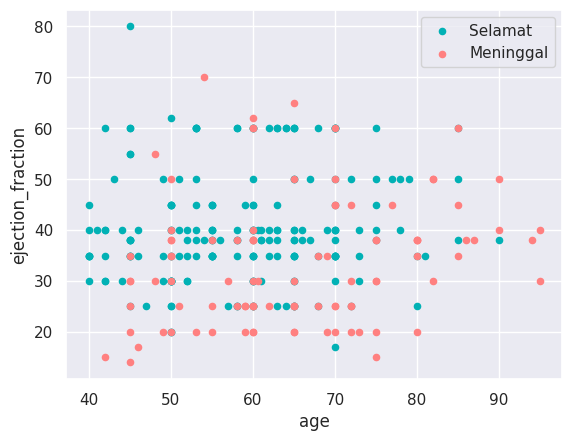

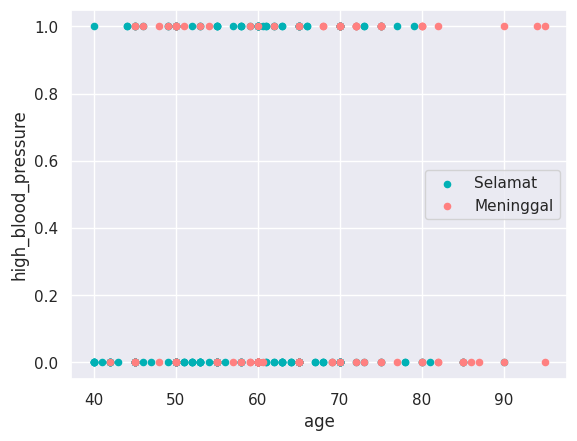

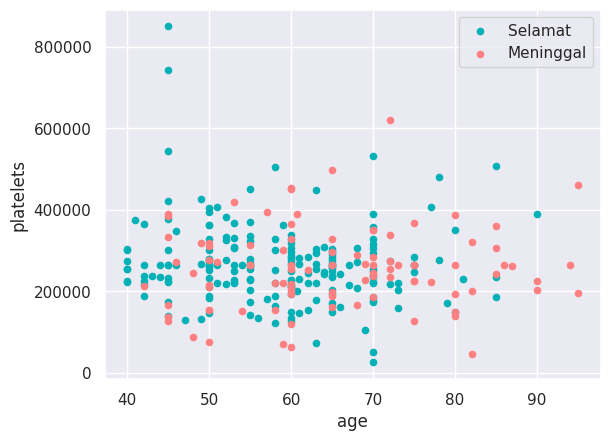

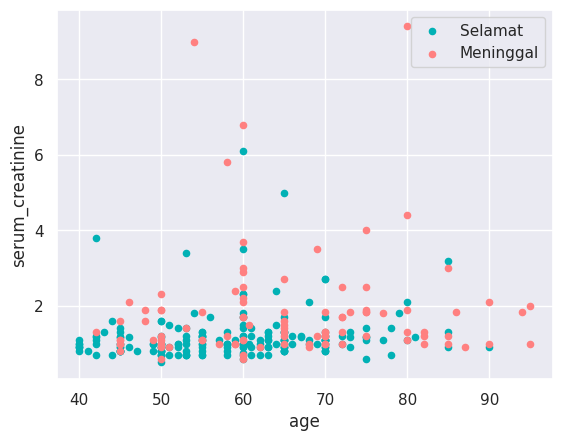

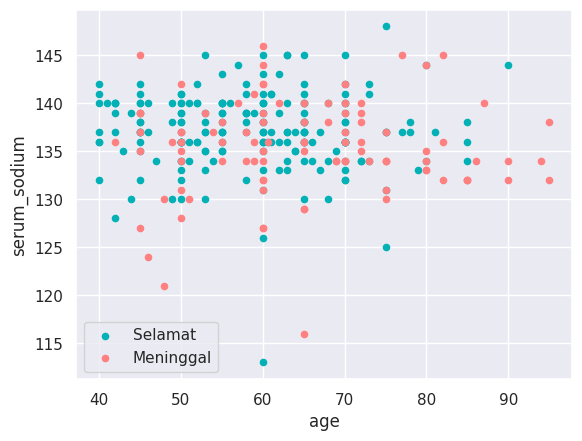

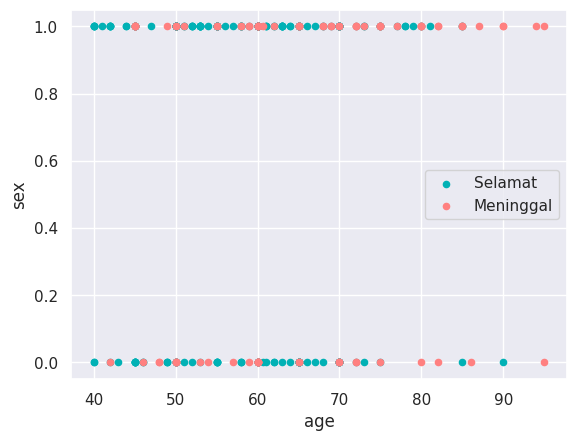

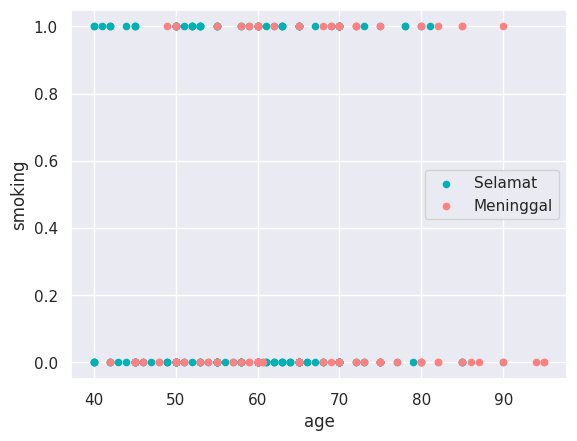

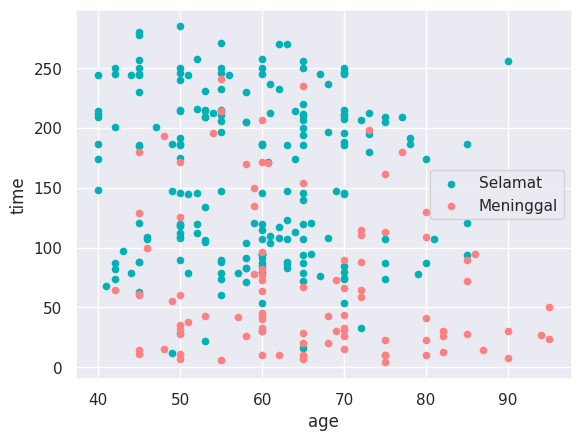

In [13]:
## Visualisasi Hubungan Umur dengan Variabel lain ##

tmp0 = 0
for i in df.columns:
    if (tmp0 > 0) and (tmp0 < len(df.columns)-1):
        ax = df[df['DEATH_EVENT'] == 0].plot(kind='scatter',
                                                      x='age', 
                                                      y=i,
                                                      color='#01b1b5', 
                                                      label='Selamat');
        df[df['DEATH_EVENT'] == 1].plot(kind='scatter', 
                                                         x='age', 
                                                         y=i, 
                                                         color='#FF8080', 
                                                         label='Meninggal', 
                                                         ax=ax);
        plt.show()
    tmp0 += 1

disini dapat dilihat jika pasien berumu >40 tahun dengan ejection_fraction rendah akan rentan untuk meninggal. begitupula dengan pasien berumur > 80 tahun dengan serum_sodium > 130 akan rentan untuk meninggal

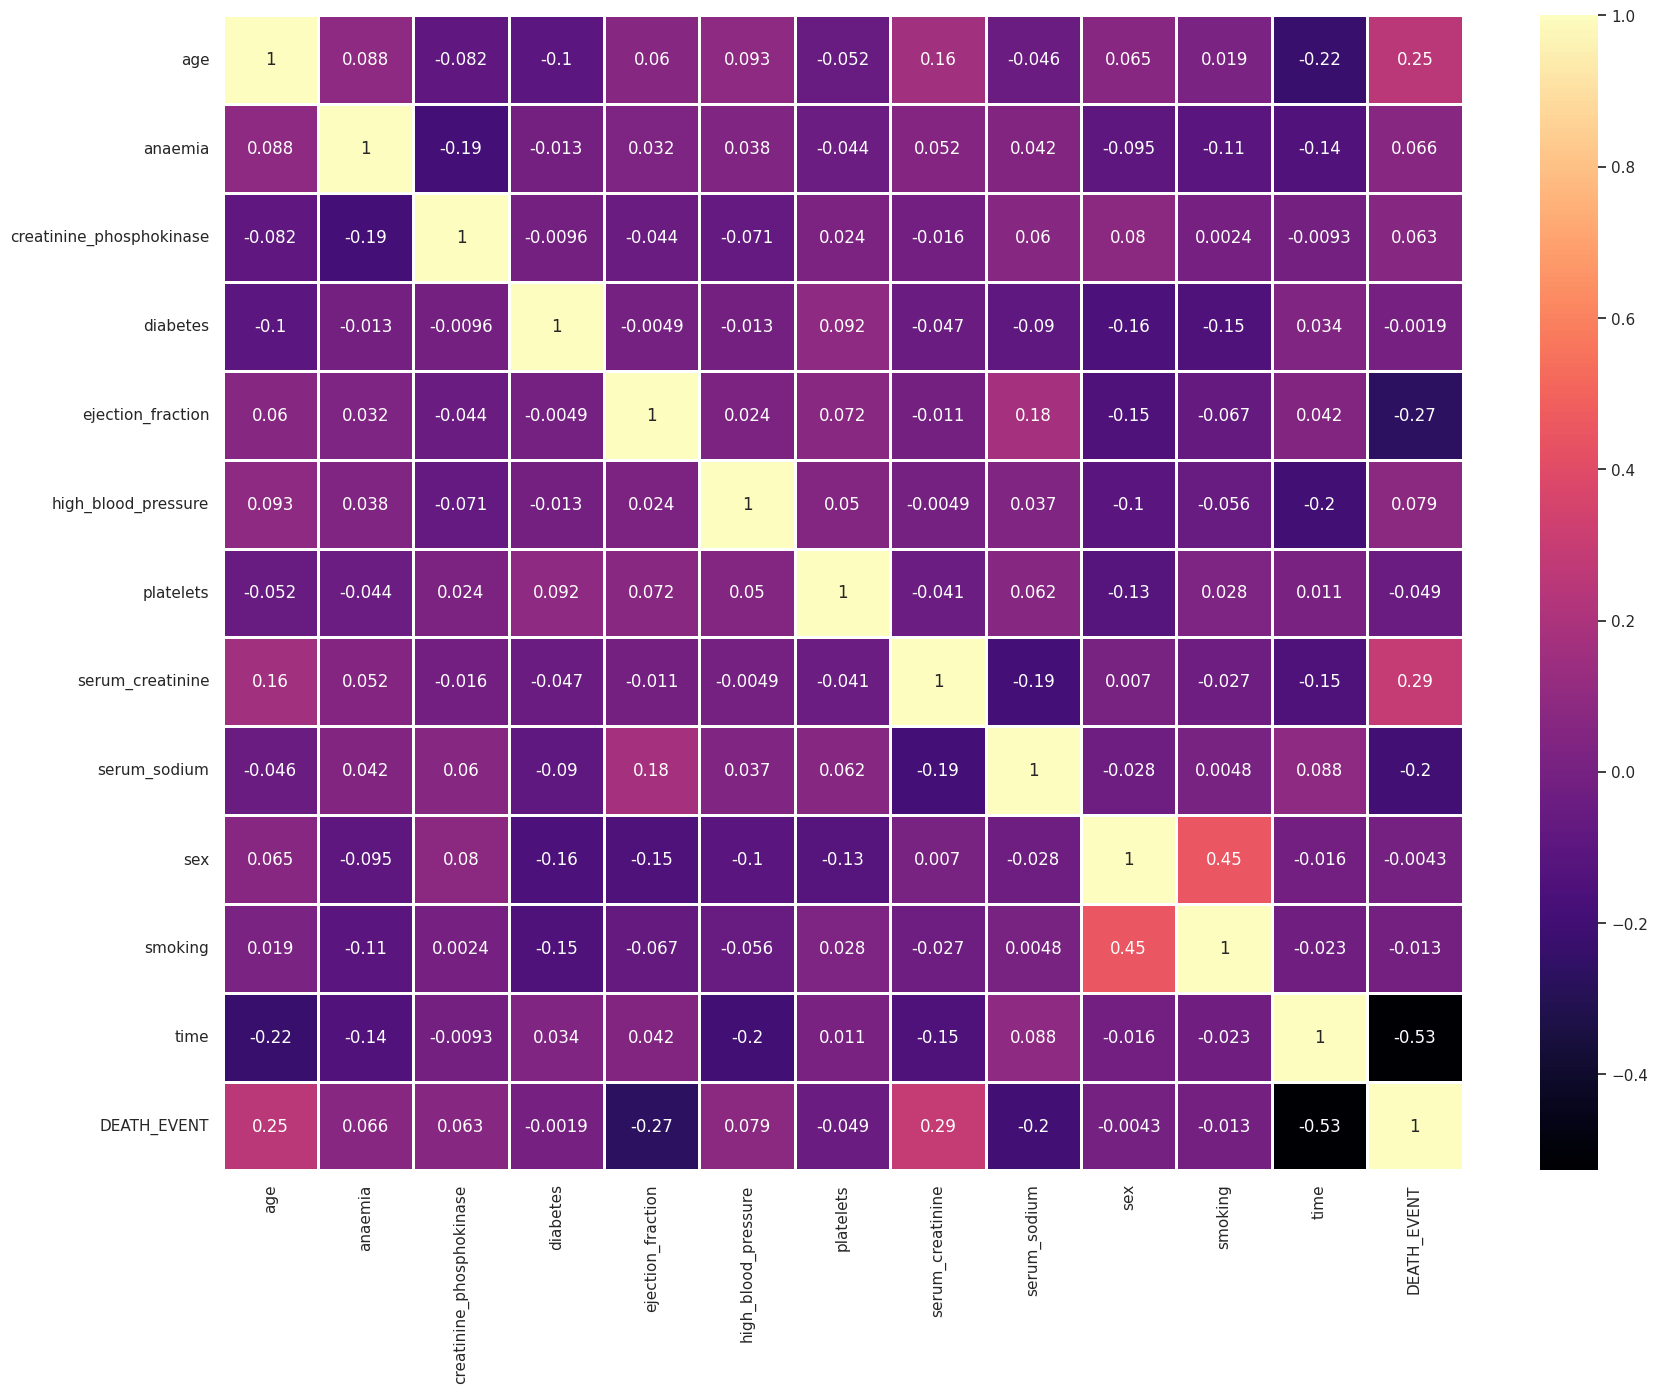

In [14]:
# Matrix Korelasi
plt.figure(figsize = [20, 15], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

berdasarkan matriks korelasinya dapat dilihat korelasi dari X terhadap y yang paling kuat adalah sebagai berikut:
1. time
2. serum creatinine
3. ejection fraction
4. age
5. serum sodium
6. high blood pressure
7. anaemia
8. creatinine phosphokinase
9. platelets
10. smoking
11. sex
12. diabetes


## **4. Metode Klastering**

### **4.1. K-Means**




In [15]:
# K-means dengan klaster=2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [16]:
# Inertia
kmeans.inertia_

1350682540158.27

In [17]:
labels = kmeans.labels_

# cek berapa banyak sampel terlabel dengan benar
correct_labels = sum(y == labels)

print("Hasil: %d dari  %d sampel terlabel dengan benar." % (correct_labels, y.size))


Hasil: 186 dari  299 sampel terlabel dengan benar.


In [18]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.62


dari hasil pengecekan  akurasi klasifikasi dari unsupervised model yang dibuat mencapai 62% dan ini masih tergolong rendah

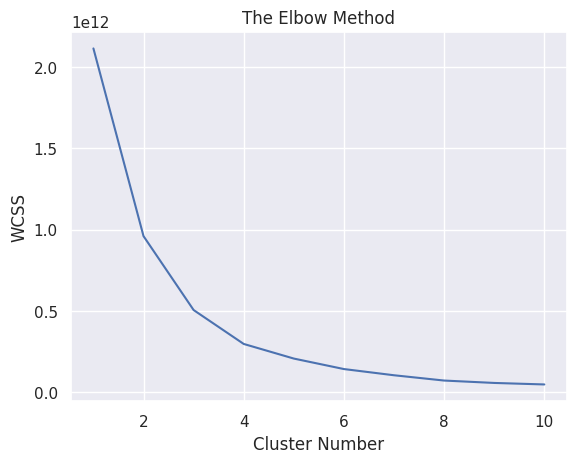

In [19]:
## mencari kelompok terbaik 
wcss = []
for i in range(1,11):
    method_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    method_kmeans.fit(X_train, y_train)
    wcss.append(method_kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

disini jika lihat kemungkinan nilai klaster terbaik adalah 2

In [20]:
method_kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state = 42, n_init=10)
y_pred_kmeans = method_kmeans.fit_predict(X_test)
y_pred_kmeans

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
# kmeans dengan klaster = 3
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# cek berapa banyak sampel terlabel dengan benar
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Hasil: %d dari  %d sampel terlabel dengan benar." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hasil: 81 dari  299 sampel terlabel dengan benar.
Accuracy score: 0.27


In [22]:
# kmeans dengan klaster = 4
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# cek berapa banyak sampel terlabel dengan benar
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Hasil: %d dari  %d sampel terlabel dengan benar." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hasil: 63 dari  299 sampel terlabel dengan benar.
Accuracy score: 0.21


## **5. Akusisi Data**

###**5.1. Membuat Fungsi Confution Matriks**

In [23]:
def get_conf_matriks(y_actual, y_predic, cmap = None, title='Tidak ada', ):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predic)
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap = cmap)
    ax.set_xlabel("Prediksi", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['Meninggal', 'Selamat'])
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['Meninggal', 'Selamat'])
    ax.set_title(title, fontsize=14, pad=20)
    plt.show()
    
    conf_matrix_value = (confusion_matrix[0,0] + confusion_matrix[1,1]) / sum(sum(confusion_matrix))
    print("Hasil Confution Matriks :" , round(conf_matrix_value*100,2), "%", sep='')

###**5.2. Matriks Confution K-Means**




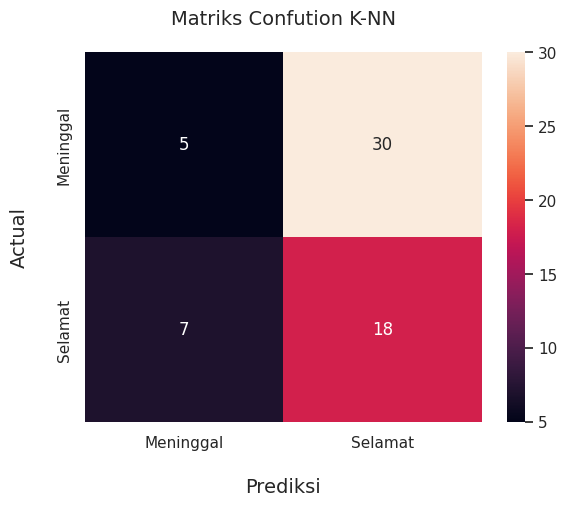

Hasil Confution Matriks :38.33%


In [24]:
# Matriks Confution K-NN
get_conf_matriks(y_test, y_pred_kmeans, title='Matriks Confution K-NN')

<Axes: xlabel='DEATH_EVENT', ylabel='Density'>

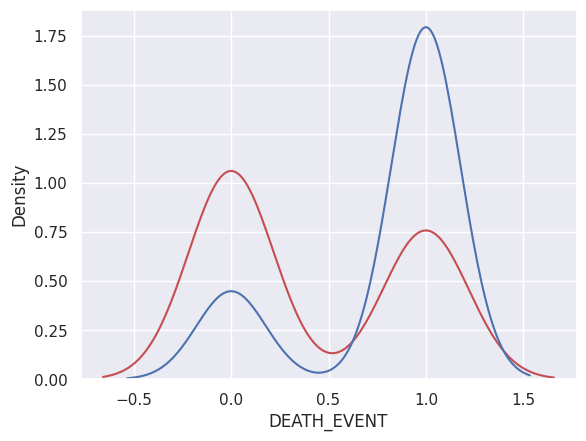

In [25]:
#Membandingkan nilai aktual dan prediksi untuk melihat seberapa baik kinerja model

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred_kmeans, color="b", label="Fitted Values" , ax=ax1)

## **6. Kesimpulan K-Means**

model ini masih sangat tidak baik karena dari hasil confution matriknya hanya bernilai 32.33% dan dapat dilihat dari gambar perbandingan diatas bahwa modelnya buruk. selain itu nilai k terbaik adalah 2